<a href="https://colab.research.google.com/github/HakhamB/Machine-Learning/blob/Unsupervised_ML-branch/Electric_vehicles_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fb6cd177158f450f9661cd15391fc3529e70c6fcd6c9f738f418b83b976d959b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from ydata_profiling import ProfileReport

In [5]:
ev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Electric_cars_dataset.csv')

In [6]:
ev.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


<ipython-input-7-21dabb095e4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ev, x='Model Year', y='Electric Vehicle Type', inner='box', palette='Dark2')


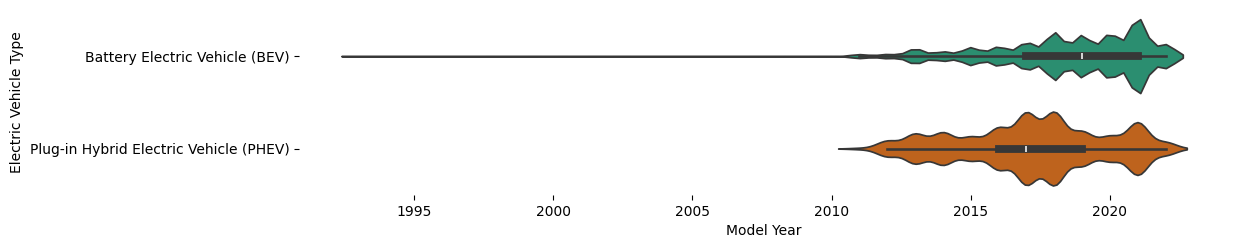

In [7]:
# @title Electric Vehicle Type vs Model Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ev['Electric Vehicle Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ev, x='Model Year', y='Electric Vehicle Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
# basic data exploration
ev.shape

(64353, 18)

In [9]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [10]:
ev.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [ ]:
# generating pandas profiling report
profile = ProfileReport(ev, title = "Electric Cars profile report")
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:528: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
#checking for missing values
ev.isnull().sum()

,0
ID,0
VIN (1-10),0
County,0
City,0
State,0
ZIP Code,6
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0


In [ ]:
# Fill numeric missing values with median
print(ev['County'].mode()

In [14]:
#handling missing values
ev['County'] = ev['County'].fillna('King')

In [15]:
ev['City'].mode()

,City
0,SEATTLE


In [16]:
ev['City'] = ev['City'].fillna('SEATTLE')

In [17]:
ev['State'].mode()

,State
0,WA


In [18]:
ev['State'] = ev['State'].fillna('WA')

In [27]:
ev['Model'].mode()

,Model
0,57


In [29]:
ev['Model'] = ev['Model'].fillna(57)

In [51]:
ev['Model Year'].mode()

,Model Year
0,2021.0


In [52]:
ev['Model Year'] = ev['Model Year'].fillna(2021)

In [76]:
ev['Model Year'] = ev['Model Year'].astype(int)

In [90]:
ev['Expected Price ($1k)'].unique()

array(['50', '15', '18', '33.9', '41.78', '16.365', '31.5', '65', '19',
       '27', '40', '39.9', '41.5', '25.004', '73', '79.596', '72', '39',
       '16', '33', '64', '69', '16.251', '29.998', '20.004', '13.9', '35',
       '102', '54', '78', '38', '21', '85', '45.6', '57', '69.2', '20',
       '14.5', '24.283', '22.2', '36.98', '73.9', '28', '60.2', '26.22',
       '25', '60', '43', '17', '20.5', '10.042', '31.67', '36.6', '33.89',
       '136.8', '21.998', '13.3', '30', '18.5', '22.857', '15.6', '27.4',
       '18.058', '30.8', '42.8', '142', '9.035', '63.4', '37.413', '42',
       '62', '59.979', '11.75', '80', '13.115', '70', '22.3', '38.5',
       '16.5', '29.49', '21.3', '18.374', '95', '40.9', '90', '22',
       '82.5', '20.6', '20.9', '28.2', '34.5', '32.1', '36.5', '45',
       '30.152', '96', '24', '46.5', '23', '37.3', '37', '67.07', '51.57',
       '26', '105', '5.499', '18.6', '65.9', '21.9', '7', '119.8',
       '21.258', '8.9', '24.69', '15.5', '16.999', '18.86', '30.

In [93]:
ev['Expected Price ($1k)'].mode()


,Expected Price ($1k)
0,69


In [94]:
# replacing the unique values with the mode
ev['Expected Price ($1k)'] = ev['Expected Price ($1k)'].replace({'N/': '69'})

In [61]:
# Removing duplicates
duplicates = ev.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")
ev.drop_duplicates(inplace=True)


Number of duplicates: 0


In [96]:
# encoding categorical features
le = LabelEncoder()
categorical_columns = ['Make', 'Model', 'Electric Vehicle Type', 'State', 'County']
for col in categorical_columns:
  ev[col] = le.fit_transform(ev[col])

In [97]:
# selecting features and target
features = ['Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Model Year']
x = ev[features]
y = ev['Expected Price ($1k)']

In [98]:
#splitting the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [99]:
# scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [100]:
# building and training SVM model
svm_model = SVR(kernel = 'rbf', C = 1.0)
svm_model.fit(x_train_scaled, y_train)

SVR()

In [103]:
# assessing model performance
y_pred = svm_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 200.84
R-squared Score: 0.69


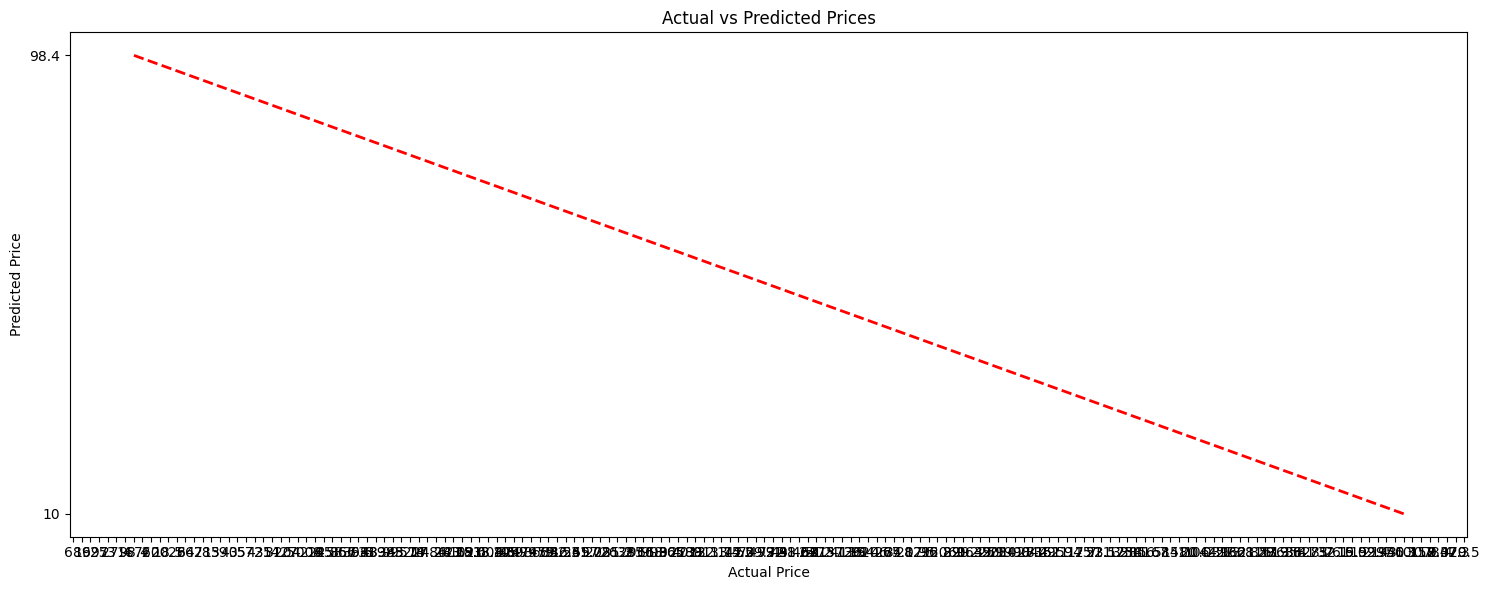

In [119]:
# Visualize Actual vs Predicted Values
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()